<a href="https://colab.research.google.com/github/juanpi19/clustered-data-analysis/blob/main/clustered_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
np.random.seed(42)


school_1 = pd.DataFrame({'school': 'school_1', 'test_grade': np.random.normal(60, 3, 20), 'study_hours': np.random.normal(5, 1.5, 20)})
school_2 = pd.DataFrame({'school': 'school_2', 'test_grade': np.random.normal(64, 3, 20), 'study_hours': np.random.normal(6, 1.5, 20)})
school_3 = pd.DataFrame({'school': 'school_3', 'test_grade': np.random.normal(75, 6, 20), 'study_hours': np.random.normal(7, 1.5, 20)})
school_4 = pd.DataFrame({'school': 'school_4', 'test_grade':np.random.normal(87, 3, 20), 'study_hours': np.random.normal(8, 1.5, 20)})
school_5 = pd.DataFrame({'school': 'school_5', 'test_grade': np.random.normal(90, 3, 20), 'study_hours': np.random.normal(10, 1.5, 20)})

df = pd.concat([school_1, school_2, school_3, school_4, school_5])


In [3]:
df.round(2).head(10)

,school,test_grade,study_hours
0,school_1,61.49,7.20
1,school_1,59.59,4.66
2,school_1,61.94,5.10
3,school_1,64.57,2.86
4,school_1,59.30,4.18
5,school_1,59.30,5.17
6,school_1,64.74,3.27
7,school_1,62.30,5.56
8,school_1,58.59,4.10
9,school_1,61.63,4.56


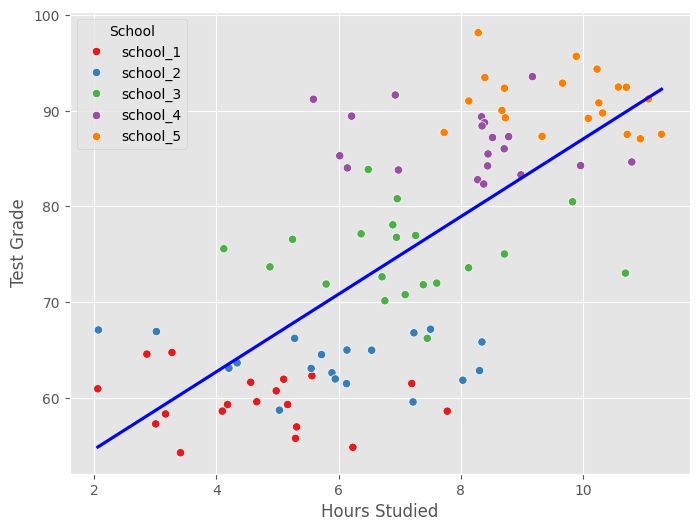

In [4]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='study_hours', y='test_grade', hue='school', palette='Set1')
sns.regplot(data=df, x='study_hours', y='test_grade', scatter=False, color='blue', ci=None)  # Adds the trend line

plt.xlabel('Hours Studied')
plt.ylabel('Test Grade')
plt.legend(title='School')
plt.show()

In [5]:
# OLS regression

# variablesfor OLS
X = df[['study_hours']]
y = df['test_grade']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             test_grade   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     102.1
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           7.13e-17
Time:                        04:32:04   Log-Likelihood:                -360.23
No. Observations:                 100   AIC:                             724.5
Df Residuals:                      98   BIC:                             729.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          46.5035      2.977     15.622      

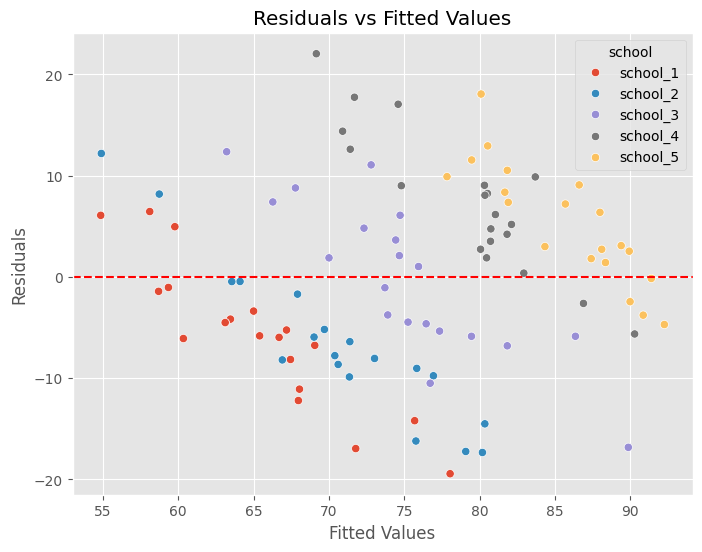

In [6]:
# Model Diagnostics

# Obtain fitted values and residuals
fitted_values = model.fittedvalues
residuals = model.resid

resid_df = pd.DataFrame({'school': df['school'], 'fitted_values': fitted_values, 'residuals': residuals})

# Plot Residuals vs Fitted Values
plt.figure(figsize=(8, 6))
sns.scatterplot(data=resid_df, x=fitted_values, y=residuals, hue='school')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.grid(True)
plt.show()

# Fixed-Effect Regression

In [7]:
# variables for OLS

# Fit Fixed-Effect model
model_fe = smf.ols('test_grade ~ study_hours + school', data=df).fit() # added school as another covariate
print(model_fe.summary())

                            OLS Regression Results                            
Dep. Variable:             test_grade   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     300.0
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           3.81e-56
Time:                        04:32:09   Log-Likelihood:                -254.39
No. Observations:                 100   AIC:                             520.8
Df Residuals:                      94   BIC:                             536.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             60.9134      1

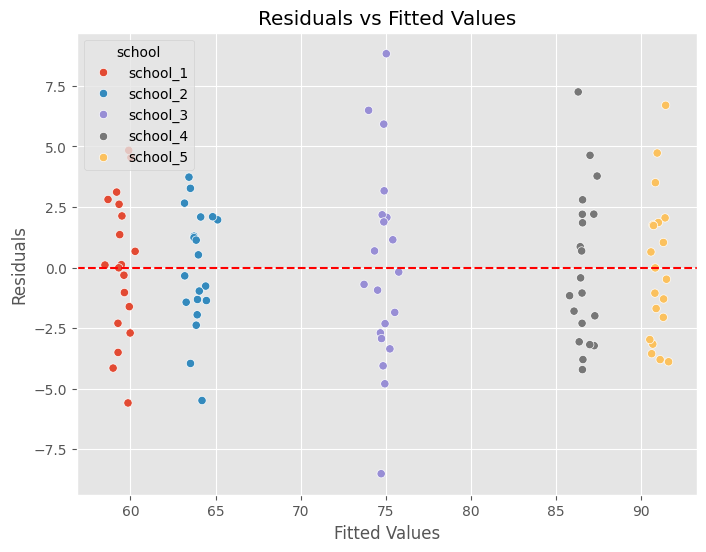

In [8]:
# Model Diagnostics

# Obtain fitted values and residuals
fitted_values = model_fe.fittedvalues
residuals = model_fe.resid

resid_df = pd.DataFrame({'school': df['school'], 'fitted_values': fitted_values, 'residuals': residuals})

# Plot Residuals vs Fitted Values
plt.figure(figsize=(8, 6))
sns.scatterplot(data=resid_df, x=fitted_values, y=residuals, hue='school')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.grid(True)
plt.show()

# Clustered Standard Errors

In [9]:
# OLS
model_ces = smf.ols('test_grade ~ study_hours', data=df).fit(cov_type='cluster', cov_kwds={'groups': df['school']}) # Correcting Standard Errors
print(model_ces.summary())

                            OLS Regression Results                            
Dep. Variable:             test_grade   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     41.23
Date:                Wed, 06 Nov 2024   Prob (F-statistic):            0.00302
Time:                        04:32:14   Log-Likelihood:                -360.23
No. Observations:                 100   AIC:                             724.5
Df Residuals:                      98   BIC:                             729.7
Df Model:                           1                                         
Covariance Type:              cluster                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      46.5035      4.753      9.785      

# Multilevel Model

In [10]:
md = smf.mixedlm("test_grade ~ study_hours", df, groups=df["school"])
mdf = md.fit()
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: test_grade
No. Observations: 100     Method:             REML      
No. Groups:       5       Scale:              10.0933   
Min. group size:  20      Log-Likelihood:     -269.2867 
Max. group size:  20      Converged:          Yes       
Mean group size:  20.0                                  
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     77.190    6.591 11.711 0.000 64.272 90.109
study_hours   -0.283    0.228 -1.242 0.214 -0.729  0.163
Group Var    203.741   46.589                           



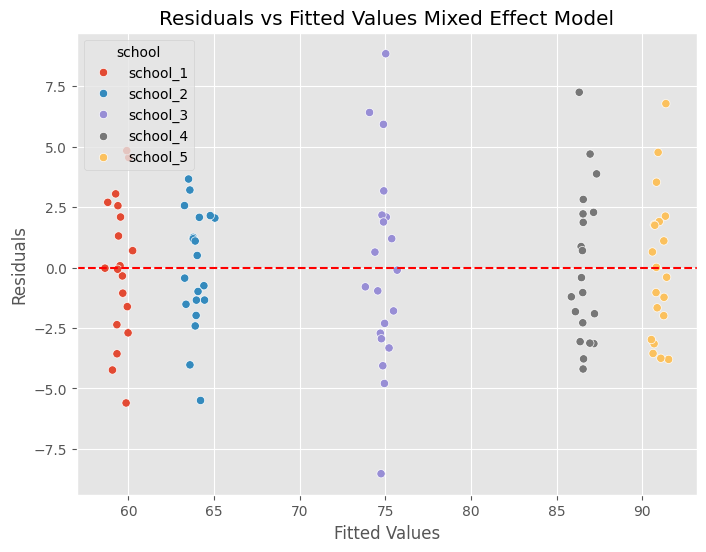

In [11]:
# Obtain fitted values and residuals
fitted_values = mdf.fittedvalues
residuals = mdf.resid

resid_df = pd.DataFrame({'school': df['school'], 'fitted_values': fitted_values, 'residuals': residuals})

# Plot Residuals vs Fitted Values
plt.figure(figsize=(8, 6))
sns.scatterplot(data=resid_df, x=fitted_values, y=residuals, hue='school')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values Mixed Effect Model')
plt.grid(True)
plt.show()

In [15]:
pd.DataFrame(mdf.random_effects)

,school_1,school_2,school_3,school_4,school_5
Group,-16.362706,-11.558516,-0.334638,11.72328,16.532581
